# CHAPTER18 하이퍼파라미터와 튜닝(2)

## 18.1 결정 트리의 하이퍼파라미터

### 18.1.1 파라미터 max_depth

- max_depth : 결정 트리의 최대 깊이를 나타내는 파라미터. max_depth가 설정되어 있지 않으면 뎅터를 모두 분할하여 필요 이상으로 데이터의 특징을 학습한다
- 이렇게 max_depth을 설정하여 트리의 높이를 제한하는 것을  가지치기라 한다

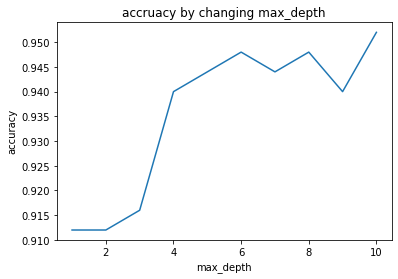

In [5]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

depth_list = [i for i in range(1,11)]

acc = []

for d in depth_list:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(depth_list, acc)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('accruacy by changing max_depth')
plt.show()

### 18.1.2 파라미터 random_state

- random_state는 결정트리에서 
  1. 결정 트리를 분할하는 값을 결정
  2. 학습 결과를 유지
  3. 학스벵 사용할 난수를 생성하기 위한 값을 설정
   

## 18.2 랜덤 포레스트의 하이퍼파라미터

### 18.2.1 파라미터 n_estimators

- n_estimators : 간이 결정 트리수를 결정

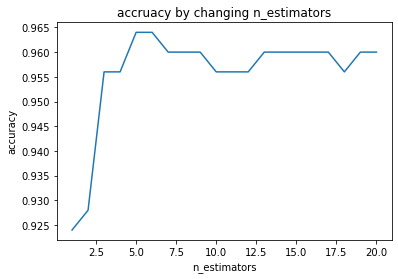

In [14]:
from sklearn.ensemble import RandomForestClassifier

X,y = make_classification(n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

n_est_list = [i for i in range(1,21)]

acc = []

for d in n_est_list:
    model = RandomForestClassifier(n_estimators=d, random_state=42)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(n_est_list, acc)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('accruacy by changing n_estimators')
plt.show()

### 18.2.2 파라미터 max_depth

- max_depth는 결정 트리에 대한 파라미터지만 랜덤 포레스트에서는 일반적인 결정 트리보다 작게 설정하는 이유는 지도 데이터에 대한 과학습을 방지하기 위해서이다
- 랜덤 포레스트는 예측 정확도 향상을 위해 복수의 결정 트리를 생성하고 그 결정 트리의 다수결로 결정하는 모델

### 18.2.3 파라미터 random_state

- 랜덤 포레스트는 결과의 고정뿐 아니라 결정 트리의 데이터 분할이나 이용 요소 결정 등 많은 곳에서 난수가 기여한다. 따라서 random_state 파라미터에 의해 분석 결과가 크게 달라진다

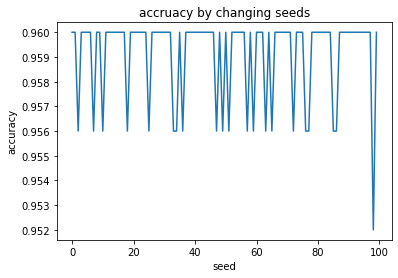

In [13]:
X,y = make_classification(n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

r_seeds = [i for i in range(100)]

acc = []

for r in r_seeds:
    model = RandomForestClassifier(random_state=r)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(r_seeds, acc)
plt.xlabel('seed')
plt.ylabel('accuracy')
plt.title('accruacy by changing seeds')
plt.show()

## 18.3 k-NN의 하이퍼파라미터

### 18.3.1 파라미터 n_neighbors

- n_neighbors는 k값을 말한다. 결과 예측시 사용되는 유사 데이터의 개수를 결정하는 파라미터
- n_neighbors가 너무 많으면 유사 데이터로 선정되는 데이터의 유사도가 커져서 분류범위가 좁은 카테고리가 잘 분류되지 않기도 한다

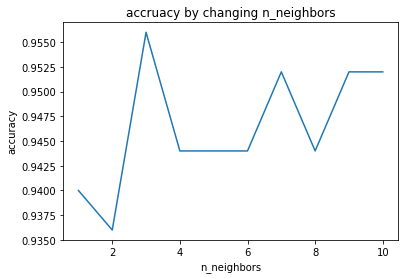

In [12]:
from sklearn.neighbors import KNeighborsClassifier

k_list = [i for i in range(1,11)]

acc = []

for r in k_list:
    model = KNeighborsClassifier(n_neighbors=r)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(k_list, acc)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('accruacy by changing n_neighbors')
plt.show()

## 18.4 튜닝 자동화

- 파라미터의 범위를 지정하여 가장 결과가 좋은 파라미터셋을 찾을 수 있다
- 그리드 서치, 랜덤 서치

### 18.4.1 그리드 서치

- 조정하려는 하이퍼파라미터값의 후보를 명시적으로 복수 지정하여 파라미터셋을 만들고 모델의 평가를 반복하여 최적의 파라미터셋을 만드는 방법
- 여러 파라미터를 동시에 튜닝하기엔 부적합


In [15]:
import scipy.stats
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

data = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

params = {
    SVC() : {
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'C' : [10 ** i for i in range(-5,5)],
        'decision_function_shape' : ['ovr','ovo'],
        'random_state' : [42]
    }
}

max_score = 0
best_param = None

for model, param in params.items():
    clf = GridSearchCV(model, param)
    clf.fit(X_train, y_train)
    pred_y = clf.predict(X_test)
    score = f1_score(y_test, pred_y, average='micro')
    if max_score < score:
        max_score = score 
        best_model = model.__class__.__name__
        best_param = clf.best_params_

print(f'파라미터 " {best_param}')
print(f'최고 점수 : {max_score}')
svm = SVC()
svm.fit(X_train, y_train)  
print()
print('조정 없음')
print(svm.score(X_test, y_test))

파라미터 " {'C': 10, 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'random_state': 42}
최고 점수 : 0.9888888888888889

조정 없음
0.9866666666666667


> 그리드 서치
  1. 후보값을 열거하고 파라미터를 검색하는 방법
  2. 후보값을 모든 파라미터로 시험하여 학습 정밀도가 가장 좋은 모델을 반환
  3. 값의 후보를 순차적으로 전부 탐색하기 때문에 실행 시간이 많이 걸린다
  

### 18.4.2 랜덤 서치

- 파라미터가 취할 수 있는 값의 범위를 지정하고, 확률로 결정된 파라미터셋을 사용하여 모델 평가를 반복함으로써 최적의 파라미터셋을 찾는 방법

In [17]:
import scipy.stats
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score

data = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

params = {
    SVC() : {
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'C' : scipy.stats.uniform(0.0001, 1000),
        'decision_function_shape' : ['ovr','ovo'],
        'random_state' : scipy.stats.randint(0,100)
    }
}

max_score = 0
best_param = None

for model, param in params.items():
    clf = RandomizedSearchCV(model, param)
    clf.fit(X_train, y_train)
    pred_y = clf.predict(X_test)
    score = f1_score(y_test, pred_y, average='micro')
    if max_score < score:
        max_score = score 
        best_model = model.__class__.__name__
        best_param = clf.best_params_

print(f'파라미터 " {best_param}')
print(f'최고 점수 : {max_score}')
svm = SVC()
svm.fit(X_train, y_train)  
print()
print('조정 없음')
print(svm.score(X_test, y_test))

파라미터 " {'C': 611.1208865939316, 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'random_state': 49}
최고 점수 : 0.9888888888888889

조정 없음
0.9866666666666667
